**End to End ML Model development**

- Problem Definition
    
- Data Collection
    
- Data Preprocessing
    
- Exploratory Data Analysis (EDA)
    
- Feature Selection and Feature scaling
    
- Model Selection and Training

- Assumptions Check
    
- Model Evaluation
    
- Save the model

**1. Problem Definition**
- Predicting house prices based on various features like size, location, number of room, etc.

**2. Data Collection**
- collect the data relevant to the problem. this could be from a CSV file, a database or an API

In [6]:
    # IMPORT all-important common packages
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.datasets import fetch_california_housing
    from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
input_data = fetch_california_housing()["data"]

In [8]:
description = fetch_california_housing()["DESCR"]


In [9]:
output_data = fetch_california_housing()['target']
len(output_data)

20640

In [10]:
target_feature = fetch_california_housing()['target_names']
target_feature

['MedHouseVal']

In [11]:
input_feature = fetch_california_housing()['feature_names']
input_feature

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [12]:
input_data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [16]:
len(input_data[0]),len(input_feature)

(8, 8)

In [22]:
housing_df = pd.DataFrame()
housing_df[input_feature]= input_data
housing_df['MedHouseVal']= output_data
housing_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

**Step-3: Feature selection-Feature scalling**

**Lets see what if we do a this task**
- Task 1: scale the data, then do the VIF
- Task 2: First do VIF, then Scale the data 

**Task 1** 
- 
Whenever you scale then data exclude the Target colums

In [27]:
# check the missing 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(housing_df.drop("MedHouseVal",axis=1))
scaled_features

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [29]:
# create a new data frame with scaled features

data_scaled = pd.DataFrame(scaled_features,columns=housing_df.columns[:-1])
data_scaled["MedHouseVal"] = housing_df["MedHouseVal"]
data_scaled.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  MedHouseVal  
0  -1.327835        4.526  
1  -1.322844        3.585  
2  -1.332827        3.521  
3  -1.337818        3.413  
4  -1.337818        3.422

In [31]:
# compute the correlation matrix
corr_matrix = data_scaled.corr()
print(corr_matrix)

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

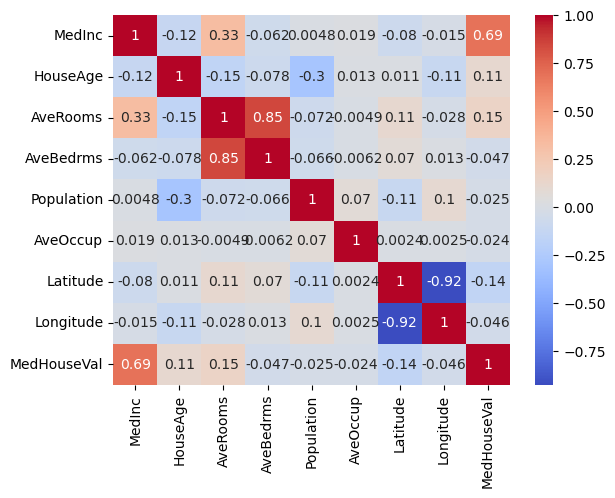

In [33]:
# Varsualize the Correlation matrix
sns.heatmap(corr_matrix,annot = True,cmap = "coolwarm")
plt.savefig('Varsualize the Correlation matrix.png')

plt.show()

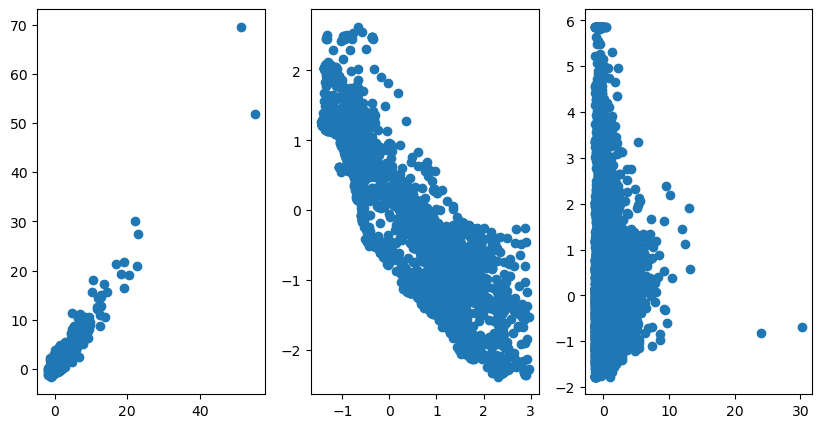

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1).scatter(data_scaled["AveRooms"],data_scaled["AveBedrms"])
plt.subplot(1,3,2).scatter(data_scaled["Latitude"],data_scaled['Longitude'])
plt.subplot(1,3,3).scatter(data_scaled["Population"],data_scaled['MedInc'])
plt.show()

**VIF Calculation**

- Every time one input variable behave as output

- we will get R_Square value

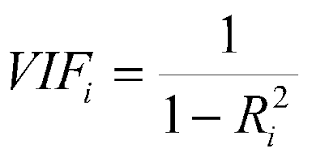

- Scaled DATA we are considering

- VIF will calculate on input columns

- So that we will Drop the Target Column: **MedHousVal**

In [39]:
data_scaled.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [41]:
X= data_scaled.drop('MedHouseVal',axis=1)
X.shape[1]
for i in range(len(X.columns)):
    print(variance_inflation_factor(X.values,i))

2.501294512541597
1.2412541182182886
8.342785615374497
6.994994771360948
1.138125081833602
1.0083244489804455
9.297624369314345
8.96226347381992


In [43]:
X.values


array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [45]:
# Calculate VIF for Each feature 
X = data_scaled.drop("MedHouseVal",axis=1)
vif_data = pd.DataFrame()
vif_data["feature"]= X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_data

feature       VIF
0      MedInc  2.501295
1    HouseAge  1.241254
2    AveRooms  8.342786
3   AveBedrms  6.994995
4  Population  1.138125
5    AveOccup  1.008324
6    Latitude  9.297624
7   Longitude  8.962263

VIF ranges

- 0 to 5

- 5 to 10

- More than 10

- First, we took the original data

- then we perform Scaling

- then we apply VIF

**Task-2**

In [49]:
# IMPORT all-important common packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the correlation matrix
corr_metrix = housing_df.corr()
corr_matrix

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.013344    -0.046701  
Population  -0.108785   0.099773    -0.024650  
AveOccup     0.002366   0.002476    -0.023737  
Latitude     1.000000  -0.924664    -0.144160  
Longitude   -0.924664   1.000000    -0.045967  
MedHouseVal -0.144160  -0.045967     1.000000

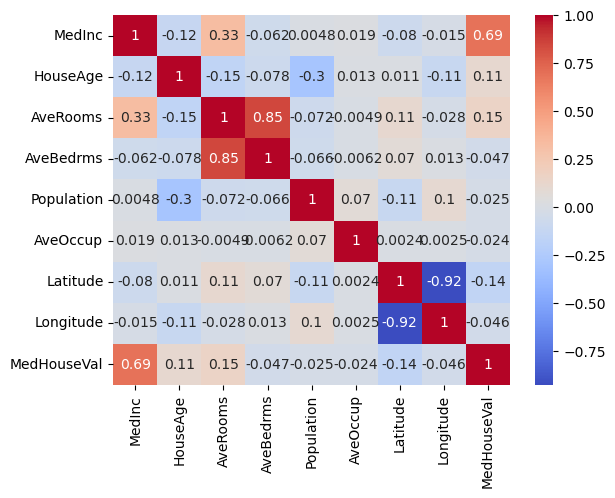

In [53]:
# Visualize the correlation matrix 
sns.heatmap(corr_matrix, annot= True,cmap = "coolwarm")
plt.show()

In [55]:
# Calculate VIF for each feature 
X = housing_df.drop("MedHouseVal",axis=1)
vif_data = pd.DataFrame()
vif_data["feature"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


Recommended Approach

Check for multicollinearity (VIF) before scaling.

Scale the data (if necessary) for model training and evaluation.

In [58]:
vif_data["VIF"]
con = vif_data["VIF"]<15
vif_data[con]
vif_data[vif_data['VIF']<15]['feature']
feature_to_keep = vif_data[vif_data["VIF"]<15]["feature"].to_list()
feature_to_keep

['MedInc', 'HouseAge', 'Population', 'AveOccup']

In [60]:
# define a threshold for VIF
vif_threshold = 15 

# create a list of features to Keep 
feature_to_keep= vif_data[vif_data['VIF']<vif_threshold]["feature"].tolist()

# Reduce the Dataset to the selected features 
X_reduced = X[feature_to_keep]

print(f"Selected Features: {feature_to_keep}")

Selected Features: ['MedInc', 'HouseAge', 'Population', 'AveOccup']


**We concluded 4 columns get these comlumns data from main dataframe: housing_df**
-

In [63]:
housing_df_new = housing_df[feature_to_keep+["MedHouseVal"]]
housing_df_new

MedInc  HouseAge  Population  AveOccup  MedHouseVal
0      8.3252      41.0       322.0  2.555556        4.526
1      8.3014      21.0      2401.0  2.109842        3.585
2      7.2574      52.0       496.0  2.802260        3.521
3      5.6431      52.0       558.0  2.547945        3.413
4      3.8462      52.0       565.0  2.181467        3.422
...       ...       ...         ...       ...          ...
20635  1.5603      25.0       845.0  2.560606        0.781
20636  2.5568      18.0       356.0  3.122807        0.771
20637  1.7000      17.0      1007.0  2.325635        0.923
20638  1.8672      18.0       741.0  2.123209        0.847
20639  2.3886      16.0      1387.0  2.616981        0.894

[20640 rows x 5 columns]

**Now Scale the data**
-

In [66]:
from sklearn. preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features  = scaler.fit_transform(housing_df[feature_to_keep])
scaled_features

array([[ 2.34476576,  0.98214266, -0.9744286 , -0.04959654],
       [ 2.33223796, -0.60701891,  0.86143887, -0.09251223],
       [ 1.7826994 ,  1.85618152, -0.82077735, -0.02584253],
       ...,
       [-1.14259331, -0.92485123, -0.3695372 , -0.0717345 ],
       [-1.05458292, -0.84539315, -0.60442933, -0.09122515],
       [-0.78012947, -1.00430931, -0.03397701, -0.04368215]])

In [68]:
# create a new  Dataframe  with scaled features
data_scaled = pd.DataFrame(scaled_features,columns=feature_to_keep)
data_scaled["MedHouseVal"]= housing_df["MedHouseVal"]
data_scaled.head()

MedInc  HouseAge  Population  AveOccup  MedHouseVal
0  2.344766  0.982143   -0.974429 -0.049597        4.526
1  2.332238 -0.607019    0.861439 -0.092512        3.585
2  1.782699  1.856182   -0.820777 -0.025843        3.521
3  0.932968  1.856182   -0.766028 -0.050329        3.413
4 -0.012881  1.856182   -0.759847 -0.085616        3.422

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

droped_feature = feature_to_keep+ target_feature
scaled_features = scaler.fit_transform(housing_df.drop(droped_feature,axis=1))

# create a new  dataframe with  Scaled features 
data_scaled = pd.DataFrame(scaled_features,columns=feature_to_keep)
data_scaled["MedHouseVal"] = housing_df['MedHouseVal']
data_scaled.head()

MedInc  HouseAge  Population  AveOccup  MedHouseVal
0  0.628559 -0.153758    1.052548 -1.327835        4.526
1  0.327041 -0.263336    1.043185 -1.322844        3.585
2  1.155620 -0.049016    1.038503 -1.332827        3.521
3  0.156966 -0.049833    1.038503 -1.337818        3.413
4  0.344711 -0.032906    1.038503 -1.337818        3.422

**Step-4: Divide the data into Input(X) and Output(Y)**

In [73]:
X = data_scaled.drop("MedHouseVal",axis=1)
y = data_scaled['MedHouseVal']

**Step-5: Divide the data into train test split**

- Package name: sklearn

- class name: model selection

- Method name: train test split

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)


Quick Check
-

**Check point 1**
- Origenal data shape

- X_train shape and X_test shape

- cheak the rows and columns

In [80]:
data_scaled.shape,X_train.shape,X_test.shape

((20640, 5), (16512, 4), (4128, 4))

**Check point-2**

- X_train rows should match with y_train rows count

- X_test rows should match with y_test rows count

In [83]:
X_train.shape,y_train.shape

((16512, 4), (16512,))

In [85]:
X_test.shape,y_test.shape

((4128, 4), (4128,))

**Check point -3**

- read the X_train and y_train and check the index

In [88]:
X.head()

MedInc  HouseAge  Population  AveOccup
0  0.628559 -0.153758    1.052548 -1.327835
1  0.327041 -0.263336    1.043185 -1.322844
2  1.155620 -0.049016    1.038503 -1.332827
3  0.156966 -0.049833    1.038503 -1.337818
4  0.344711 -0.032906    1.038503 -1.337818

In [90]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

**Step-6: Model development**

- model develop by only train data

- X_train and y_train

- package name: sklearn

- class name: linear_model

- method_name : LinearRegression

In [93]:
from sklearn.linear_model import LinearRegression
#train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Step-7: Model predictions**

In [96]:
y_pred = model.predict(X_test)
y_pred



array([2.41888549, 2.47737599, 2.46017044, ..., 0.66842483, 2.22901036,
       1.56462426])

**Step-8-Check Assumptions of Linear Regression**

- Linearity (features)

- Independence of errors (errors)

- Homoscedasticity(errors)

- Normality of residuals(errors)

- Multicollinearity(features)

**Linearity**
-

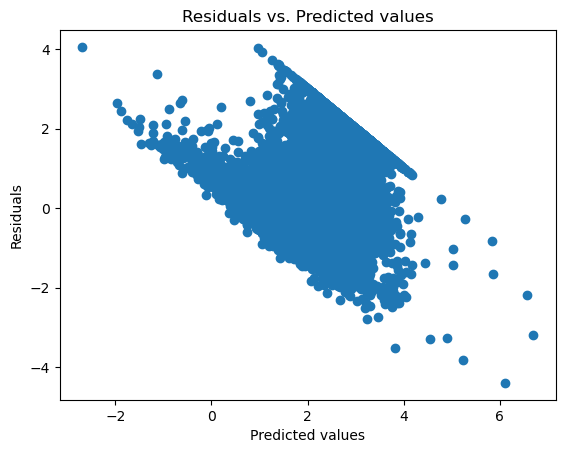

In [107]:
# Plot residuals vs. predicted values
# train error

preds = model.predict(X_train)
residuals = y_train-preds # y_actual - y prediction

plt.scatter(preds,residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted values")
plt.savefig('Residuals vs. Predicted values.png')
plt.show()

**2. Independence of Errors**

Definition:

The residuals (errors) should be independent of each other. This means that there should be no correlation between the errors.

In [110]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")


Durbin-Watson statistic: 2.0069900308810227


**3. Homoscedasticity**

Definition:

The residuals should have constant variance at every level of the independent variables. This means that the spread of residuals should be consistent across all levels of the independent variables.

**4. Normality of Residuals**

Definition:

The residuals should be approximately normally distributed.

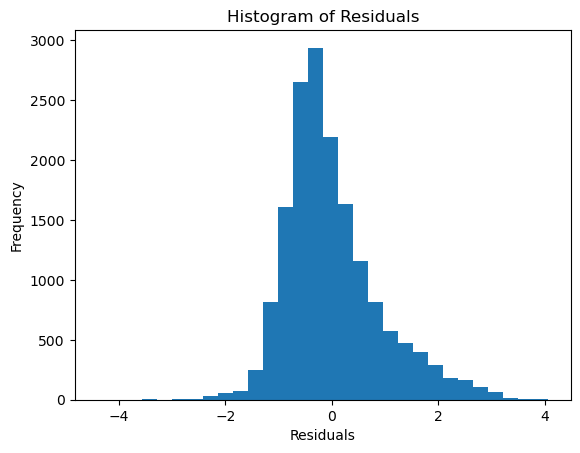

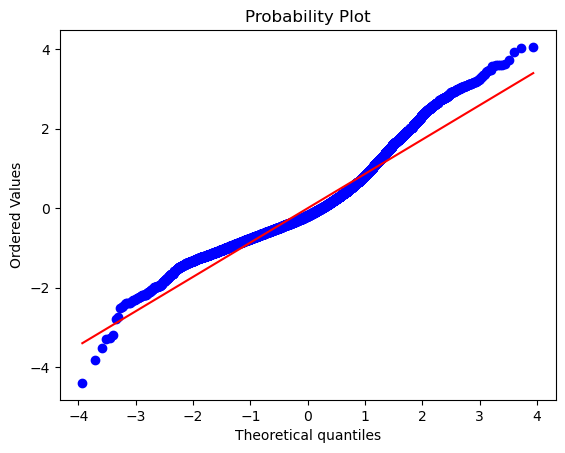

In [116]:
import scipy.stats as stats 

# plot histogram of residuals 

plt.hist(residuals,bins = 30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
plt.savefig('Histogram of Residuals.png')

# Q-Q plot
stats.probplot(residuals, dist = "norm",plot=plt)
plt.savefig('Q-Q Plot.png')
plt.show()

**5. Multicollinearity**

Definition:

The independent variables should not be too highly correlated with each other. High multicollinearity means that one independent variable can be linearly predicted from the others with a substantial degree of accuracy.

**Step-9: Model evaluation**

In [120]:
y_pred = model.predict(X_test)
y_pred

array([2.41888549, 2.47737599, 2.46017044, ..., 0.66842483, 2.22901036,
       1.56462426])

In [122]:
len(X_test),len(y_test),len(y_pred)

(4128, 4128, 4128)

In [124]:
print(y_pred[:5])# prediction 
print(y_test.values[:5])#actual

[2.41888549 2.47737599 2.46017044 2.41815573 2.78421767]
[5.    2.939 4.125 1.576 3.041]


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
df=X_test
df["Y_actual"]=y_test
df["Y_prediction"] = y_pred
df['Error']= df["Y_actual"] - df["Y_prediction"]
df["Error_square"] = df["Error"]**2
mse = np.sum(df["Error_square"] )/len(X_test)
rmse = np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)

MSE:  0.8444047034959511
RMSE:  0.9189149598825515


In [128]:
X_test

MedInc  HouseAge  Population  AveOccup  Y_actual  Y_prediction  \
15712 -0.234704 -0.038032    1.010411 -1.432653   5.00000      2.418885   
4119   0.282943 -0.115509   -0.698469  0.683662   2.93900      2.477376   
15725 -0.278781 -0.152216    1.005730 -1.432653   4.12500      2.460170   
14616 -0.062546 -0.133136   -1.325839  1.197766   1.57600      2.418156   
13238  1.045992 -0.162391   -0.703151  0.948201   3.04100      2.784218   
...         ...       ...         ...       ...       ...           ...   
13521  0.299587 -0.282569   -0.651651  1.077975   1.64300      1.933213   
16913  1.390417 -0.145384    0.898047 -1.382740   5.00001      4.008368   
20069 -0.138627  0.159038    1.113413 -0.399452   1.23200      0.668425   
446   -0.421058 -0.266063    1.047866 -1.357783   1.82600      2.229010   
2209  -0.026645 -0.301391    0.551589 -0.139904   0.68000      1.564624   

          Error  Error_square  
15712  2.581115      6.662152  
4119   0.461624      0.213097  
15725  1.664830      2.771657  
14616 -0.842156      0.709226  
13238  0.256782      0.065937  
...         ...           ...  
13521 -0.290213      0.084224  
16913  0.991642      0.983354  
20069  0.563575      0.317617  
446   -0.403010      0.162417  
2209  -0.884624      0.782560  

[4128 rows x 8 columns]

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
y_pred = model.predict(X_test)
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


MAE: 0.6834826107665013
MSE: 0.8444047034959511
RMSE: 0.9189149598825515
R-squared: 0.37581556067136934


**Step-10:Save The model**

1) Using pickle

    - Save the model

    - It is similar to python read text and write text

    - open (filename.txt,'w')

    - pickle.dump(model,open('modelname.pkl','wb'))

In [133]:
import pickle
pickle.dump(model,
            open('house_model.pkl','wb'))

#Model name=model
#In which name the model is saving: house_model
# extenstion:.pkl
# wb: write in bytes

**Step-11:
Load the mod**el- 

open('filename.txt','r- ')

pickle.load(open('modelname.pkl','b'))



In [136]:
# Loading model to compare the results
model = pickle.load(open('house_model.pkl','rb'))
model

LinearRegression()

**Step-12**

**Predict on test data**

In [139]:
X_test.values
# when we are passing multiples values using a Dataframe
# is called as btach predictions
model.predict(X_test)

array([2.41888549, 2.47737599, 2.46017044, ..., 0.66842483, 2.22901036,
       1.56462426])

**Real time predictions**

In [142]:
model.predict([[100,200,300,400]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1113.69932722])

**2) Using Joblib**

In [145]:
import joblib

# Load the model from the .joblib file
joblib.dump(model, 'house_model.joblib')

saved_model = joblib.load('house_model.joblib')

# Use the loaded model for predictions
y_pred = saved_model.predict(X_test)

# Print predictions
print("Predictions:", y_pred)
# y_pred compare with y_test

Predictions: [2.41888549 2.47737599 2.46017044 ... 0.66842483 2.22901036 1.56462426]
